2021.1


免責事項：本教材（解説，およびプログラム）は教育目的に提供されるものです．本教材を利用したことによる直接あるいは間接的な損害に関して，著作者および著作者の所属組織等，如何なる個人・組織も一切の責任を負いません．本教材の利用は利用者個人の責任のもと行ってください．

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None) # web上のデータを読み込む
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'] # 列名を付ける

In [ ]:
display(df)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
features = df.loc[:, 'sepal_length':'petal_width'] # 特徴量だけを取り出す
display(features)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
targets = df.loc[:, ['species']] # 正解カテゴリーを取り出す
display(targets)

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
# dataframeをndarrayに変換
#X = features.values
#y = targets.values
X = np.array(features)
y = np.array(targets)
y = y.ravel() # 配列の次元を落とす

In [ ]:
scaler = StandardScaler() # scalerインスタンスの生成
X = scaler.fit_transform(X) # 特徴量データの標準化

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # 訓練データと検証データへの分割

In [ ]:
clf = MLPClassifier(max_iter=10000) # 多層ニューラルネットワークの生成

In [ ]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

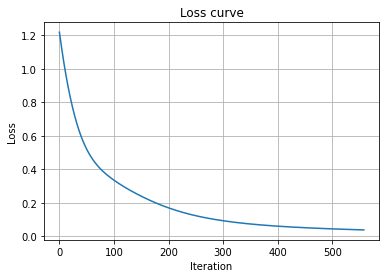

In [ ]:
plt.plot(clf.loss_curve_)
plt.title("Loss curve") # グラフのタイトル
plt.xlabel("Iteration") # x軸は繰り返し数（エポック数）
plt.ylabel("Loss") # y軸は損失値
plt.grid() # グリッド線を描く

In [ ]:
clf.predict(X_test) # 検証データに対する予測結果表示

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica'], dtype='<U15')

In [ ]:
c = clf.score(X_test, y_test)
print("正解率は{}%です．".format(c * 100)) # 検証データでの成績表示

正解率は94.73684210526315%です．
